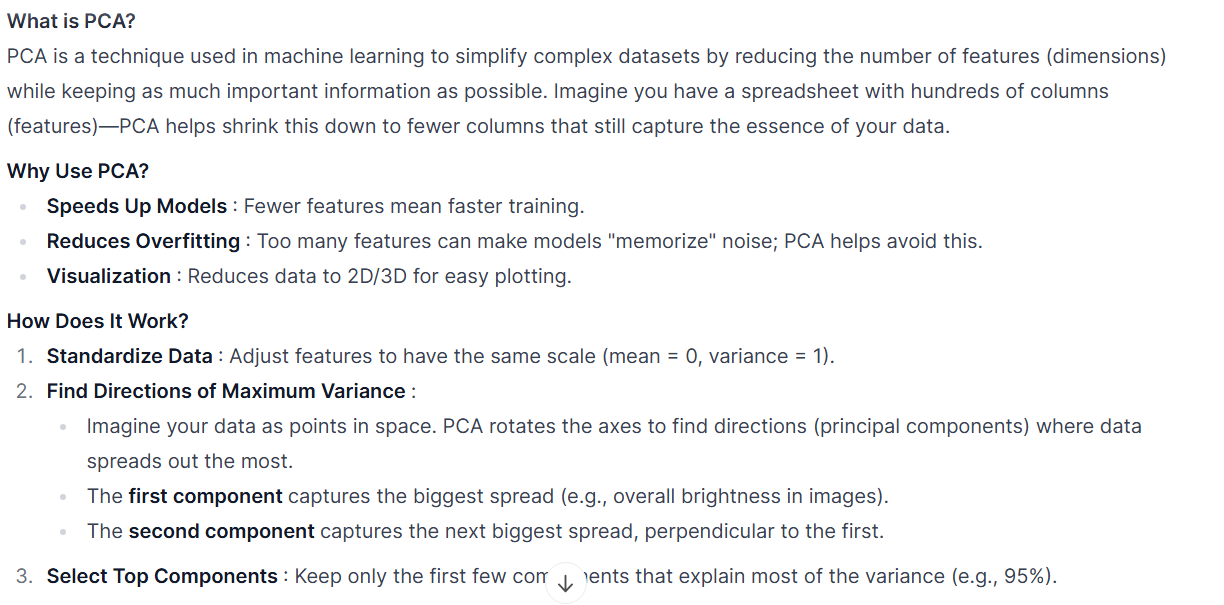

In [4]:
import numpy as np
import pandas as pd

# Set random seeds for reproducibility
np.random.seed(23)
rng = np.random.default_rng(23)  # For pandas reproducibility

# Generate first class samples
mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)
df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1

# Generate second class samples
mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)
df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0

# Concatenate the two DataFrames
df = pd.concat([df, df1], ignore_index=True)

# Shuffle the rows for randomness
df = df.sample(frac=1, random_state=23).reset_index(drop=True)

# Display the first few rows
print(df.head())

   feature1  feature2  feature3  target
0 -0.331617 -1.632386  0.619114       1
1  1.010229  1.437830  2.327788       0
2  0.241106 -0.952510 -0.136267       1
3  1.676860  4.187503 -0.080565       0
4  2.823378 -0.332863  2.637391       0


In [5]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()


# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [6]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [7]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [8]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [9]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [16]:
pc = eigen_vectors[0:2]
pc

array([[-0.9427458 , -0.26768973,  0.19892854],
       [-0.13433401,  0.8507233 ,  0.50815769]])

In [20]:
# Import necessary libraries
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Create a sample dataset (e.g., student grades in Math, Science, English)
data = np.array([
    [80, 85, 70],  # Student A
    [90, 95, 65],  # Student B
    [70, 75, 80],  # Student C
    [60, 65, 90],  # Student D
    [50, 55, 95]   # Student E
])

# Step 2: Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Step 3: Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 principal components
principal_components = pca.fit_transform(data_standardized)

# Step 4: Print the results
print("Original Data:\n", data)
print("\nStandardized Data:\n", data_standardized)
print("\nPrincipal Components (Reduced Dimensions):\n", principal_components)

# Step 5: Explained Variance Ratio
print("\nExplained Variance Ratio (How much each PC explains):\n", pca.explained_variance_ratio_)

Original Data:
 [[80 85 70]
 [90 95 65]
 [70 75 80]
 [60 65 90]
 [50 55 95]]

Standardized Data:
 [[ 0.70710678  0.70710678 -0.87705802]
 [ 1.41421356  1.41421356 -1.31558703]
 [ 0.          0.          0.        ]
 [-0.70710678 -0.70710678  0.87705802]
 [-1.41421356 -1.41421356  1.31558703]]

Principal Components (Reduced Dimensions):
 [[ 1.32269573e+00 -1.40380777e-01]
 [ 2.39264429e+00  7.76049562e-02]
 [-2.64557626e-17  3.75112371e-17]
 [-1.32269573e+00  1.40380777e-01]
 [-2.39264429e+00 -7.76049562e-02]]

Explained Variance Ratio (How much each PC explains):
 [0.99656943 0.00343057]


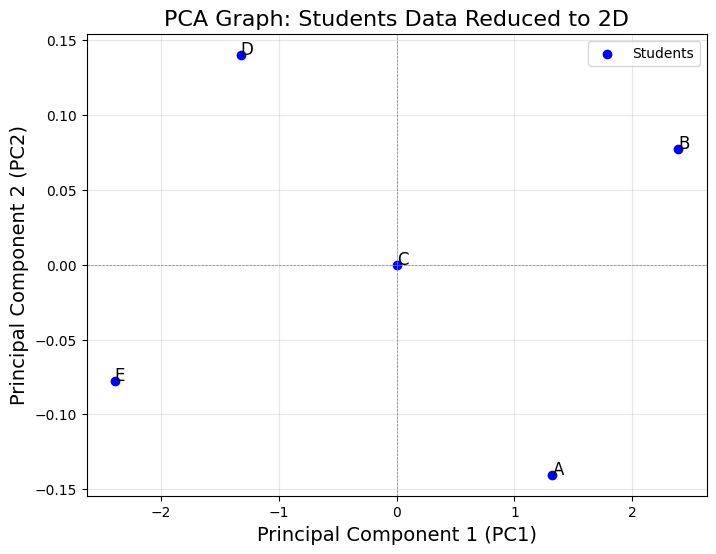

In [21]:
# Import necessary libraries
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Create a sample dataset (e.g., student grades in Math, Science, English)
data = np.array([
    [80, 85, 70],  # Student A
    [90, 95, 65],  # Student B
    [70, 75, 80],  # Student C
    [60, 65, 90],  # Student D
    [50, 55, 95]   # Student E
])

# Step 2: Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Step 3: Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 principal components
principal_components = pca.fit_transform(data_standardized)

# Step 4: Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c='blue', label='Students')
for i, label in enumerate(['A', 'B', 'C', 'D', 'E']):  # Label each point with the student name
    plt.text(principal_components[i, 0], principal_components[i, 1], label, fontsize=12)

# Add axis labels and title
plt.xlabel('Principal Component 1 (PC1)', fontsize=14)
plt.ylabel('Principal Component 2 (PC2)', fontsize=14)
plt.title('PCA Graph: Students Data Reduced to 2D', fontsize=16)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Add horizontal axis line
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)  # Add vertical axis line
plt.grid(alpha=0.3)
plt.legend()
plt.show()